In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import string
import re
import nltk

# Evaluation Matrix

In [10]:
from sklearn.metrics import f1_score, precision_recall_fscore_support, classification_report

def evaluation(real_labels, pred_labels):
    f1_micro = f1_score(real_labels, pred_labels, average='micro')
    f1_macro = f1_score(real_labels, pred_labels, average='macro')
    f1_weighted = f1_score(real_labels, pred_labels, average='weighted')
    #f1_binary = f1_score(real_labels, pred_labels, average='binary')
    #f1_samples = f1_score(real_labels, pred_labels, average='samples')

    micro_p, micro_r, micro_f1, _ = precision_recall_fscore_support(real_labels, pred_labels, average='micro')
    macro_p, macro_r, macro_f1, _ = precision_recall_fscore_support(real_labels, pred_labels, average='macro')
    

    report = classification_report(real_labels, pred_labels)

    print('f1 micro: ',f1_micro)
    print('f1 macro: ',f1_macro)
    print('f1 weighted: ',f1_weighted)
    #print('f1 binary: ',f1_binary)
    #print('f1 samples: ',f1_samples)
    print('micro p, micro r, micro f1:', micro_p, micro_r, micro_f1)
    print('macro p, macro r, macro f1:', macro_p, macro_r, macro_f1)
    print(report)


# Load Data

In [11]:
# tfidf
#X = pd.read_csv('../data/clean.csv')['tweet']
X_train=pd.read_csv("../data/X_train.csv")['tweet']
X_test=pd.read_csv("../data/X_test.csv")['tweet']

from sklearn.feature_extraction.text import CountVectorizer
text = X_train.values
text_ = X_test.values
vectorizer = CountVectorizer(ngram_range = (1, 2))
vectorizer.fit(text)
tfidf_train = vectorizer.transform(text)
tfidf_test =vectorizer.transform(text_)
tfidf_train = pd.DataFrame.sparse.from_spmatrix(tfidf_train)
tfidf_test = pd.DataFrame.sparse.from_spmatrix(tfidf_test)

In [12]:
ski_train = pd.read_csv('../data/train_ski.csv')
ski_test = pd.read_csv('../data/test_ski.csv')
#tfidf_train = pd.read_csv('../data/tfidf_train.csv')
#tfidf_train = pd.read_csv('../data/tfidf_test.csv')
liwc = pd.read_csv('../data/LIWC.csv')
liwc_train, liwc_test = train_test_split(liwc, random_state=17, test_size = 0.1)
y_train = pd.read_csv('../data/y_train.csv')['label']
y_test = pd.read_csv('../data/y_test.csv')['label']
#X_ski_train.shape,y_train.shape
#y_train
#X_tfidf_train

# Standardize Data

In [7]:
scaler = StandardScaler()
scaler.fit(ski_train)
ski_train = pd.DataFrame(scaler.transform(ski_train))
scaler.fit(ski_test)
ski_test = pd.DataFrame(scaler.transform(ski_test))

# Correlation Analysis

'\ncolumns = np.full((corr.shape[0],), True, dtype=bool)\nfor i in range(corr.shape[0]):\n    for j in range(i+1, corr.shape[0]):\n        if corr.iloc[i,j] >= 0.6:\n            if columns[j]:\n                columns[j] = False\nselected_columns = X_train.columns[columns]\nX_train_f = X_train[selected_columns]\nX_test_f = X_test[selected_columns]\nX_train_f.shape\n'

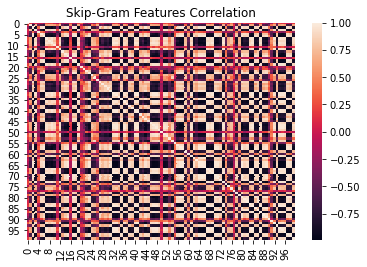

In [19]:
ax = plt.axes()
ax.set_title('Skip-Gram Features Correlation')
corr = ski_train.corr()
sns.heatmap(corr, ax = ax)
'''
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.6:
            if columns[j]:
                columns[j] = False
selected_columns = X_train.columns[columns]
X_train_f = X_train[selected_columns]
X_test_f = X_test[selected_columns]
X_train_f.shape
'''

<AxesSubplot:title={'center':'LIWC Features Correlation'}>

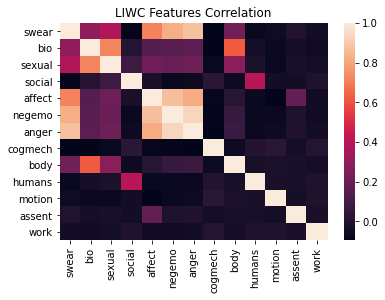

In [21]:
ax = plt.axes()
ax.set_title('LIWC Features Correlation')
corr = liwc_train.corr()
sns.heatmap(corr, ax = ax)

# Feature Combination

## With TFIDF Features

In [11]:
model = LogisticRegression(max_iter = 2000).fit(tfidf_train, y_train)
y_preds = model.predict(tfidf_test)
evaluation(y_preds, y_test)

f1 micro:  0.9048003227107705
f1 macro:  0.7130408796425409
f1 weighted:  0.9119166748987001
micro p, micro r, micro f1: 0.9048003227107705 0.9048003227107705 0.9048003227107705
macro p, macro r, macro f1: 0.7066353050687475 0.738817343671386 0.7130408796425409
              precision    recall  f1-score   support

           0       0.25      0.44      0.32        79
           1       0.95      0.94      0.94      1965
           2       0.92      0.83      0.88       435

    accuracy                           0.90      2479
   macro avg       0.71      0.74      0.71      2479
weighted avg       0.92      0.90      0.91      2479



## With Skip-gram Features

In [12]:
model = LogisticRegression(max_iter = 2000).fit(ski_train, y_train)
y_preds = model.predict(ski_test)
evaluation(y_preds, y_test)

f1 micro:  0.7845905607099637
f1 macro:  0.29309825195901146
f1 weighted:  0.8792947558770343
micro p, micro r, micro f1: 0.7845905607099637 0.7845905607099637 0.7845905607099637
macro p, macro r, macro f1: 0.3333333333333333 0.26153018690332125 0.29309825195901146
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.78      0.88      2479
           2       0.00      0.00      0.00         0

    accuracy                           0.78      2479
   macro avg       0.33      0.26      0.29      2479
weighted avg       1.00      0.78      0.88      2479



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## With LIWC Features

In [13]:
model = LogisticRegression(max_iter = 2000).fit(liwc_train, y_train)
y_preds = model.predict(liwc_test)
evaluation(y_preds, y_test)

f1 micro:  0.7837837837837838
f1 macro:  0.3026657150678865
f1 weighted:  0.8735182190594273
micro p, micro r, micro f1: 0.7837837837837838 0.7837837837837838 0.7837837837837838
macro p, macro r, macro f1: 0.33703843861869776 0.3953733766233767 0.3026657150678865
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.88      2464
           2       0.02      0.40      0.03        15

    accuracy                           0.78      2479
   macro avg       0.34      0.40      0.30      2479
weighted avg       0.99      0.78      0.87      2479



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Since the Coherence Score on LDA is around 0.4, lower than 0.5, we didn't use that feature.
Seems tfidf seems to be the best extraction method. 

# Feature Selection

In [15]:
select = SelectFromModel(LogisticRegression(class_weight='balanced',
                                            penalty="l1",C=0.01, solver = 'saga', 
                                            max_iter = 2000)).fit(tfidf_train,y_train)
#X_liwc_ski_train_ = select.fit_transform(X_liwc_ski_train,y_train)


feature_idx = select.get_support()
print(feature_idx)

selected_columns = tfidf_train.columns[feature_idx]
tfidf_train_ = tfidf_train[selected_columns]
tfidf_test_ = tfidf_test[selected_columns]
tfidf_test_.shape

[False False False ... False False False]


(2479, 24)

Since only 24 features are selected in the data frame, we decided to use all features.

# Model Selection
## SVM

In [14]:
model = svm.LinearSVC(max_iter = 2000).fit(tfidf_train, y_train)
y_preds = model.predict(tfidf_test)
evaluation(y_preds, y_test)

f1 micro:  0.8939088342073417
f1 macro:  0.7207940587977694
f1 weighted:  0.8965016179525181
micro p, micro r, micro f1: 0.8939088342073417 0.8939088342073417 0.8939088342073417
macro p, macro r, macro f1: 0.7204272000188903 0.7253017235602375 0.7207940587977694
              precision    recall  f1-score   support

           0       0.34      0.42      0.37       112
           1       0.93      0.94      0.94      1938
           2       0.89      0.82      0.85       429

    accuracy                           0.89      2479
   macro avg       0.72      0.73      0.72      2479
weighted avg       0.90      0.89      0.90      2479



Logistic Regression has better performance.

# Hyper-parameter Tuning

In [26]:
from sklearn.model_selection import cross_val_score
score = []
for i in [100, 10, 1.0, 0.1, 0.01]:
    model = LogisticRegression(max_iter = 2000, C=i)
    scores = cross_val_score(model, tfidf_train, y_train, cv=5, scoring='f1_micro')
    score.append(scores)
    print(scores)


[0.89240081 0.88993499 0.8937458  0.89576328 0.89686099]
[0.90002242 0.89441829 0.90226407 0.89957409 0.90067265]
[0.90024658 0.8982291  0.90293656 0.90360906 0.90515695]
[0.90069491 0.89733244 0.90069491 0.90091908 0.90852018]
[0.87334678 0.87670926 0.87558843 0.87738175 0.88654709]


# Plot
C = 1 is most optimal

In [39]:
scores = []
for i in score:
    scores.append(sum(i)/5)

Text(0, 0.5, 'f1_micro')

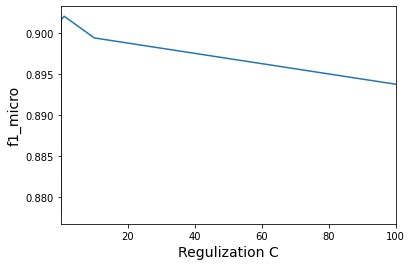

In [38]:
plt.plot([100, 10, 1.0, 0.1, 0.01], scores)
plt.xlim(0.01, 100) 
plt.xlabel('Regulization C', fontsize=14)
plt.ylabel('f1_micro', fontsize=14)

In [8]:
# define models and parameters

solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(tfidf_train, y_train)
y_preds = grid_result.predict(tfidf_test)
evaluation(y_preds, y_test)

KeyboardInterrupt: 